# Semana 8 Clase 1

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**series temporales **

In [ ]:
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2015.csv"

In [ ]:
df_15=pd.read_csv(ruta, parse_dates=True, index_col=0)

In [ ]:
df_15.head()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789


Test de Mann - Kendall
nos dice si la tencia es creciente o decreciente


In [ ]:
!pip install pymannkendall

In [ ]:
import pymannkendall as mk

ya se puede aplicar a las series temporales

In [ ]:
resultado=mk.original_test(df_15["PM10"], alpha= 0.05)

In [ ]:
resultado

Mann_Kendall_Test(trend='decreasing', h=np.True_, p=np.float64(0.012908845896614007), z=np.float64(-2.486274203194176), Tau=np.float64(-0.08718952280596116), s=np.float64(-5792.0), var_s=5425116.666666667, slope=np.float64(-0.02072633401418798), intercept=np.float64(45.04943944450191))

In [ ]:
resultado1=mk.original_test(df_15["CO"], alpha= 0.05)

In [ ]:
resultado1

Mann_Kendall_Test(trend='no trend', h=np.False_, p=np.float64(0.5817462777408493), z=np.float64(0.5508357455876581), Tau=np.float64(0.01932861658889056), s=np.float64(1284.0), var_s=5425116.666666667, slope=np.float64(6.247824481807817e-05), intercept=np.float64(0.6844165052306556))

In [ ]:
for val in resultado: print(val)

decreasing
True
0.012908845896614007
-2.486274203194176
-0.08718952280596116
-5792.0
5425116.666666667
-0.02072633401418798
45.04943944450191


In [ ]:
df_15.columns

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2'], dtype='object')

In [ ]:
for val in df_15.columns:
  resultado=mk.original_test(df_15[val], alpha= 0.05)
  print( val)
  for val1 in resultado: print(val1)
  print("\n")


CO
no trend
False
0.5817462777408493
0.5508357455876581
0.01932861658889056
1284.0
5425116.666666667
6.247824481807817e-05
0.6844165052306556


NO
no trend
False
0.7957212659815356
0.2588885070844566
0.009092277585428271
604.0
5425116.666666667
0.0012858925479734154
16.806508096809377


NO2
no trend
False
0.5793937916242409
0.5542704189818134
0.019449044106578352
1292.0
5425116.666666667
0.0020411195118570746
25.011727927674126


NOX
no trend
False
0.8050110399399659
0.246867150204913
0.008670781273521
576.0
5425116.666666667
0.0020127440321533133
42.052811020930704


O3
decreasing
True
8.206697881463221e-05
-3.9382823805733342
-0.13810025590847508
-9174.0
5425116.666666667
-0.017067828597011815
30.719580098773797


PM10
decreasing
True
0.012908845896614007
-2.486274203194176
-0.08718952280596116
-5792.0
5425116.666666667
-0.02072633401418798
45.04943944450191


PM25
no trend
False
0.24865561519056523
-1.1536209262619153
-0.040463645943097995
-2688.0
5425116.666666667
-0.00546983735323

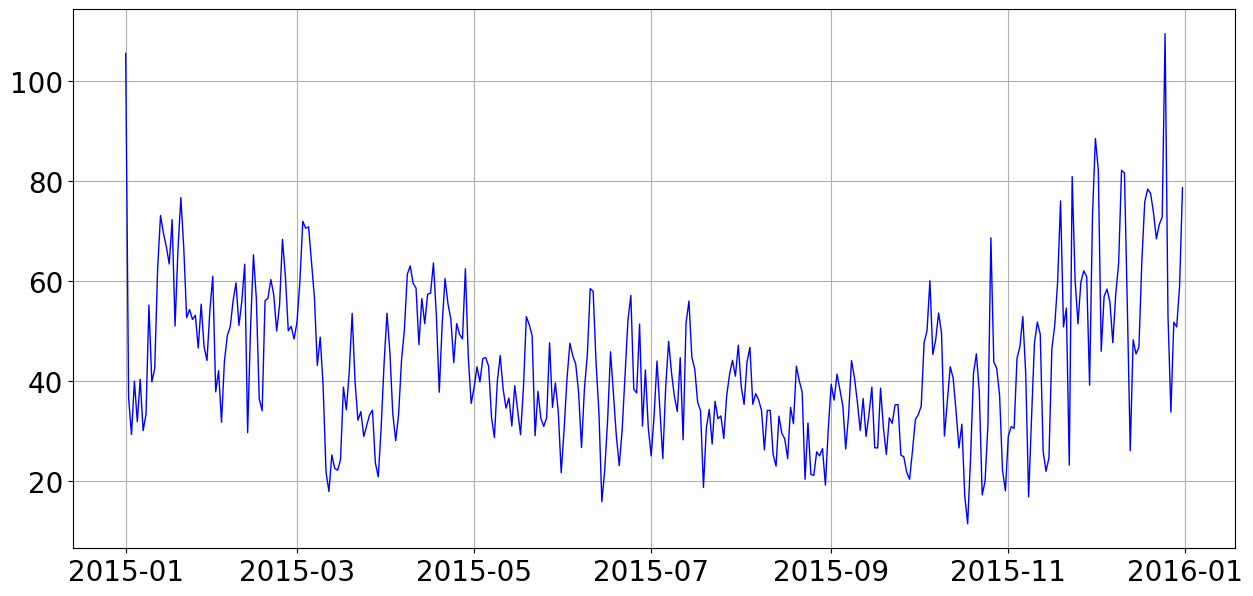

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
plt.plot(df_15["PM10"], lw=1, color="blue")
plt.tick_params(labelsize=20)
plt.grid(True)

In [ ]:
slope=mk.original_test(df_15["PM10"], alpha= 0.05).slope
intercept=mk.original_test(df_15["PM10"], alpha= 0.05).intercept

In [ ]:
linea=[]
for i in range(len(df_15)):
  linea.append(slope*i+intercept)

In [ ]:
linea= pd.DataFrame(linea, index = df_15.index)

linea de tendencia sobre el contaminante PM10

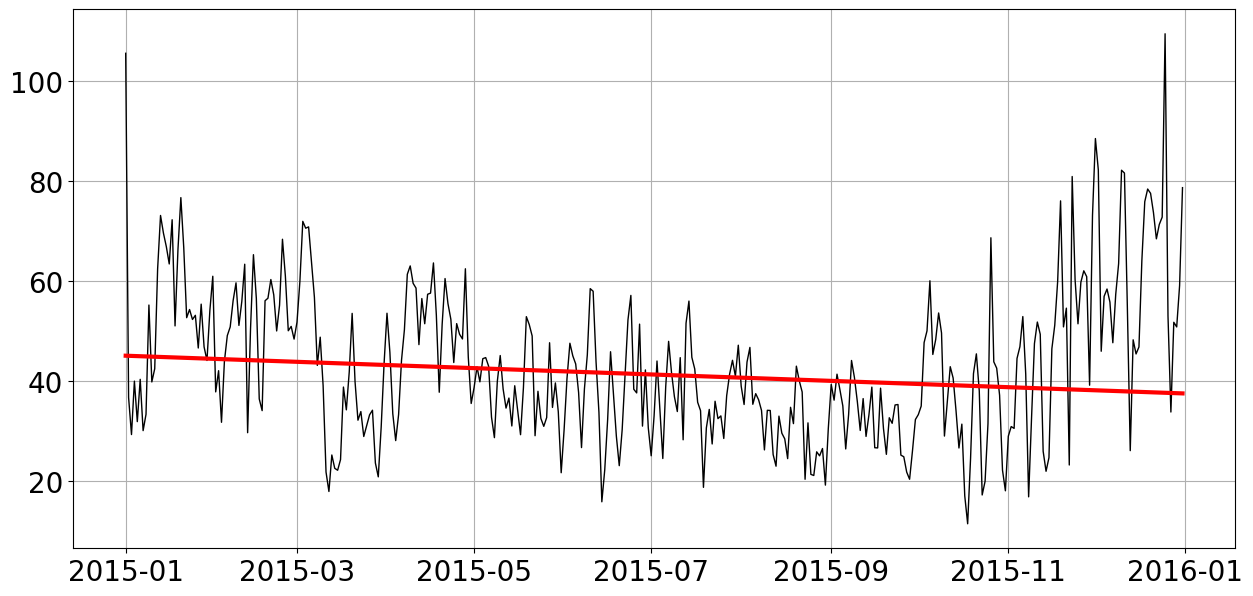

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
plt.plot(df_15["PM10"],lw=1, color='black')
plt.plot(linea,lw=3, color='red') # Grafica la línea de tendencia obtenida con la pendiente de Sen
plt.tick_params(labelsize=20)
plt.grid(True)

In [ ]:
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2020.csv"
df_20 = pd.read_csv(ruta, parse_dates = True, index_col=0)
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2021.csv"
df_21 = pd.read_csv(ruta, parse_dates = True, index_col=0)
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2022.csv"
df_22 = pd.read_csv(ruta, parse_dates = True, index_col=0)
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2023.csv"
df_23 = pd.read_csv(ruta, parse_dates = True, index_col=0)

In [ ]:
df = pd.concat([df_20,df_21,df_22,df_23],axis=0)

In [ ]:
df

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2020-01-01,0.428817,9.031579,13.382716,22.637895,18.774803,61.312903,26.716475,2.047619
2020-01-02,0.179193,4.286374,8.154297,12.235566,17.941581,26.385827,5.731481,0.942748
2020-01-03,0.306560,13.092157,21.731023,35.358824,24.060172,37.513944,11.231092,1.107143
2020-01-04,0.350833,11.978131,25.974958,38.288270,25.286115,52.280000,29.207951,7.677885
2020-01-05,0.427045,11.007952,29.782972,40.908549,30.433094,39.737609,21.806647,11.798077
...,...,...,...,...,...,...,...,...
2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588


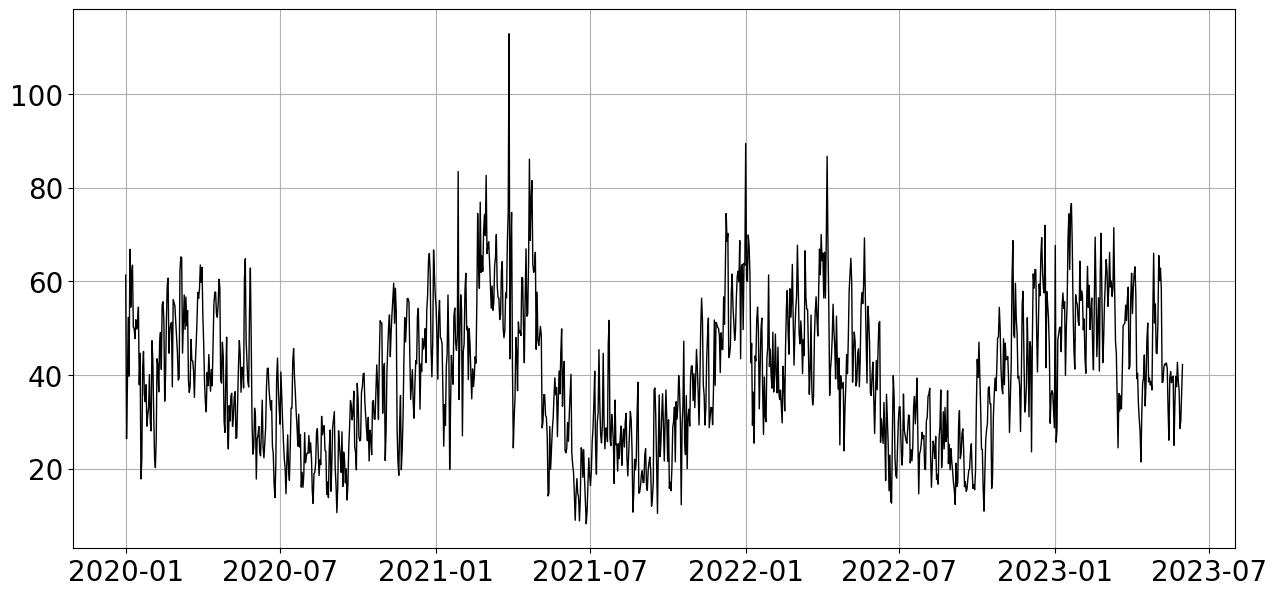

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
plt.plot(df["PM10"],lw=1, color='black')
plt.tick_params(labelsize=20)
plt.grid(True)

In [ ]:
for val in df.columns: # Recorre cada nombre de columna que exista en el DataFrame 'df'
    resultado = mk.original_test(df[val], alpha = 0.05)
    print(val)
    for val_1 in resultado: print(val_1) #Imprimir uno por uno
    print('\n') #linea de separación en blanco

CO
increasing
True
0.0
11.162982537389231
0.21104133065424435
163954.0
215713956.66666666
0.00010859993276843735
0.29448769643071804


NO
increasing
True
3.577604879012597e-11
6.620593056880137
0.12516588769708617
97239.0
215713957.66666666
0.0033155730400020373
8.698442939898955


NO2
increasing
True
2.220446049250313e-16
8.219399797729825
0.15539188112465102
120721.0
215713955.66666666
0.003746181807094772
17.878128734179956


NOX
increasing
True
4.596323321948148e-14
7.542960607031686
0.14260356476731958
110786.0
215713956.66666666
0.007245417198841384
27.21820670174999


O3
no trend
False
0.4805763230288058
0.705375923705529
0.013336662886593957
10361.0
215713957.66666666
0.0005014150362987589
30.298729543496982


PM10
increasing
True
0.0007086436949528263
3.386212952661272
0.0640188136921871
49735.0
215713957.66666666
0.004152539098397998
36.330878589459246


PM25
increasing
True
0.01200550173515924
2.511982572377768
0.047491185908781396
36895.0
215713955.66666666
0.00142473873296

  inovative

  divide la serie en dos mitades

  ordena cada mitad de forma acendente

  grafica por pares

  nos da una linea recta
  
  por enzima crece y debajo decrece

In [ ]:
df_15["PM10"]

,PM10
fecha,
2015-01-01,105.573684
2015-01-02,36.687845
2015-01-03,29.269022
2015-01-04,39.961538
2015-01-05,31.855643
...,...
2015-12-27,33.779817
2015-12-28,51.736973
2015-12-29,50.809013


In [ ]:
len(df_15)

365

In [ ]:
int( len(df_15)/2)

182

Primera parte

In [ ]:
p1= df_15["PM10"].iloc[0: int( len(df_15)/2)]

segunda parte

In [ ]:
p2= df_15["PM10"].iloc[int( len(df_15)/2): 2* int( len(df_15)/2)]

figura

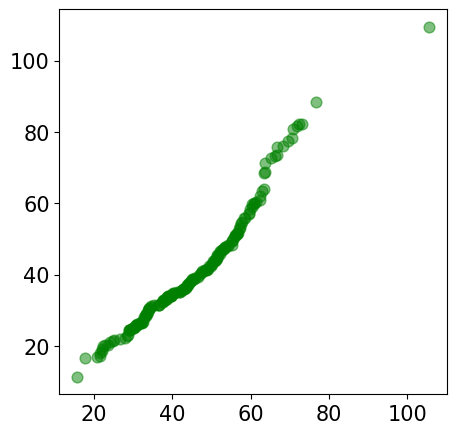

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=60, color='green',alpha=0.5)
plt.tick_params(labelsize=15)

# s nos da el tamaño del punto

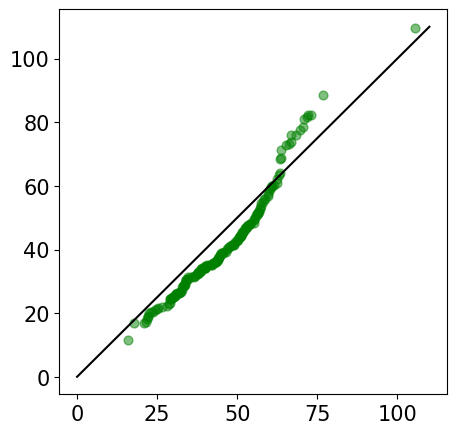

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='green', alpha=0.5);
plt.tick_params(labelsize=15)

x_min = 0
x_max = 110
x_vals = np.linspace(x_min, x_max, 100)

plt.plot(x_vals, x_vals, color='black')
plt.show()

Tarea
Tendencia de otros dos contaminantes


**Para el CO:**

In [ ]:
df_15["CO"]

,CO
fecha,
2015-01-01,1.050696
2015-01-02,0.807585
2015-01-03,0.640755
2015-01-04,0.726940
2015-01-05,0.530815
...,...
2015-12-27,0.450000
2015-12-28,0.896782
2015-12-29,0.833744


In [ ]:
len(df_15)

365

In [ ]:
int( len(df_15)/2)

182

In [ ]:
p1= df_15["CO"].iloc[0: int( len(df_15)/2)]

In [ ]:
p2= df_15["CO"].iloc[int( len(df_15)/2): 2* int( len(df_15)/2)]

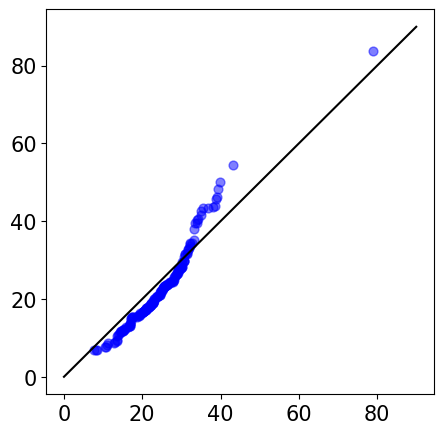

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='blue', alpha=0.5);
plt.tick_params(labelsize=15)

x_min = 0
x_max = 90
x_vals = np.linspace(x_min, x_max, 100)

plt.plot(x_vals, x_vals, color='black')
plt.show()

**Para el PM25**

In [ ]:
p1= df_15["PM25"].iloc[0: int( len(df_15)/2)]

In [ ]:
p2= df_15["PM25"].iloc[int( len(df_15)/2): 2* int( len(df_15)/2)]

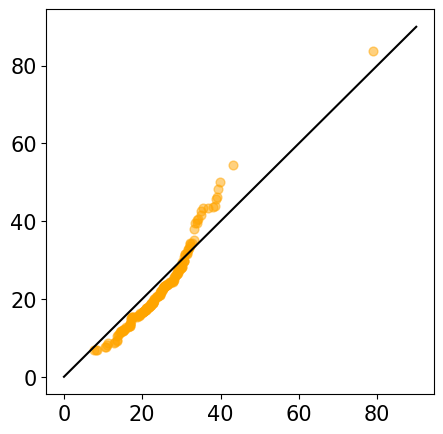

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=100)
plt.scatter(sorted(p1),sorted(p2), s=40, color='orange', alpha=0.5);
plt.tick_params(labelsize=15)

x_min = 0
x_max = 90
x_vals = np.linspace(x_min, x_max, 100)

plt.plot(x_vals, x_vals, color='black')
plt.show()

Semana 8 clse 2

Funcion de autocorrelacion ACF
nos ayuda a saber si nuestros datos tienen alguna correlacion

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2015.csv"

In [ ]:
df_15=pd.read_csv(ruta, parse_dates=True, index_col=0)

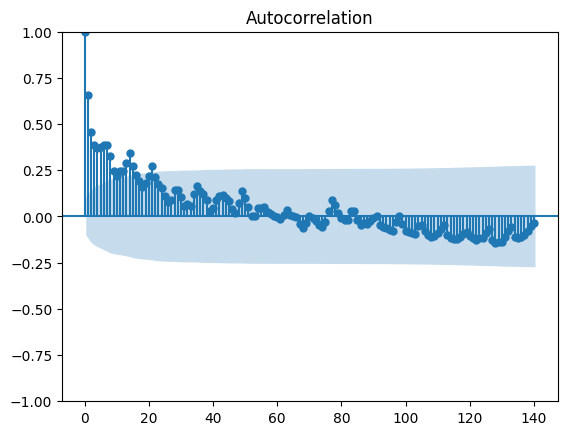

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_15["PM10"], lags=140)
plt.show()

el primer dato es uno
tenemos estacionalidad
se repite un ciclo cada semana
si la correlacion disminuyte gradualmente pero se mantiene alta, podemos considerar posible no estacionalidad
vanda azul: son los intervalos de confianza
si hay un patron ondulatorio, hay estacionalidad


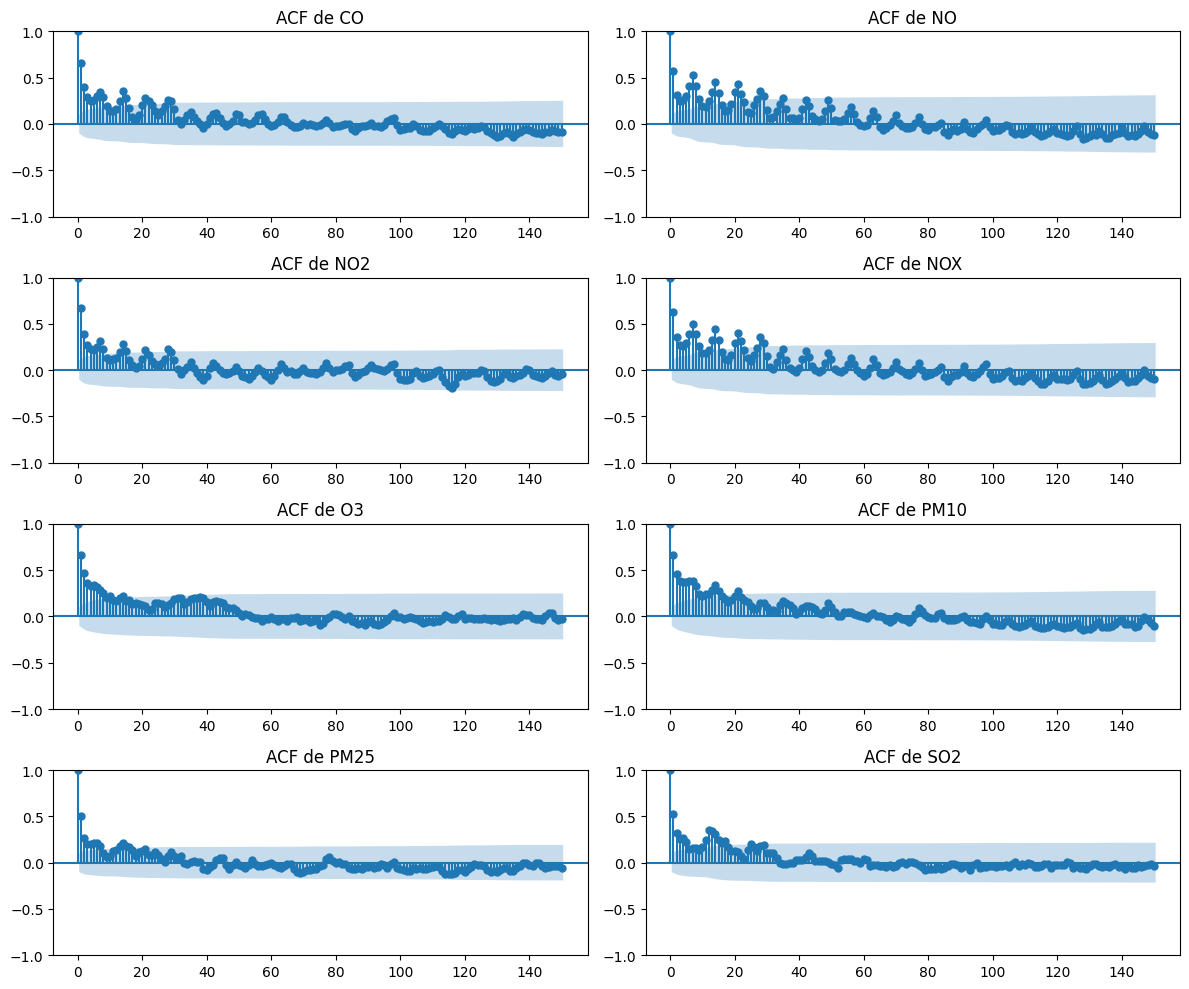

In [ ]:
variables=df_15.columns.tolist()

fig, axes= plt.subplots(nrows=4, ncols=2, figsize=(12,10))
axes=axes.flatten()

for idx, var_name in enumerate(variables):
  plot_acf(df_15[var_name].dropna(), lags=150, ax=axes[idx])
  axes[idx].set_title(f"ACF de {var_name}")
plt.tight_layout()
plt.show()

MI serie va hacer estacionaria si la funcion de autocorrelacion ACF se va a cero rapidamente

Para CO
Pible estacionalidad, si tiene estacionalidad pero no es estacionaria

Para el NO  
Tiene estacionalidad,  es estacionaria

Para el NO2
tiene estacionalidad, es estacionaria

para el NOX
tiene estacionalidad, es estacionaria

para el O3
 no tiene estacionalidad, es estacionaria
 Para el PM10
  no tiene estacionalidad, es estacionaria
  Para el PM25
   no tiene estacionalidad, es estacionaria
   para SO2
  no tiene estacionalidad, es estacionaria

In [ ]:
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2020.csv"
df_20 = pd.read_csv(ruta, parse_dates = True, index_col=0)
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2021.csv"
df_21 = pd.read_csv(ruta, parse_dates = True, index_col=0)
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2022.csv"
df_22 = pd.read_csv(ruta, parse_dates = True, index_col=0)
ruta="https://raw.githubusercontent.com/marinlopabi/Temas-Selectos-PQ-AD-Python/refs/heads/main/Datos/rama_2023.csv"
df_23 = pd.read_csv(ruta, parse_dates = True, index_col=0)

In [ ]:
df = pd.concat([df_20,df_21,df_22,df_23],axis=0)

In [ ]:
df

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2020-01-01,0.428817,9.031579,13.382716,22.637895,18.774803,61.312903,26.716475,2.047619
2020-01-02,0.179193,4.286374,8.154297,12.235566,17.941581,26.385827,5.731481,0.942748
2020-01-03,0.306560,13.092157,21.731023,35.358824,24.060172,37.513944,11.231092,1.107143
2020-01-04,0.350833,11.978131,25.974958,38.288270,25.286115,52.280000,29.207951,7.677885
2020-01-05,0.427045,11.007952,29.782972,40.908549,30.433094,39.737609,21.806647,11.798077
...,...,...,...,...,...,...,...,...
2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588


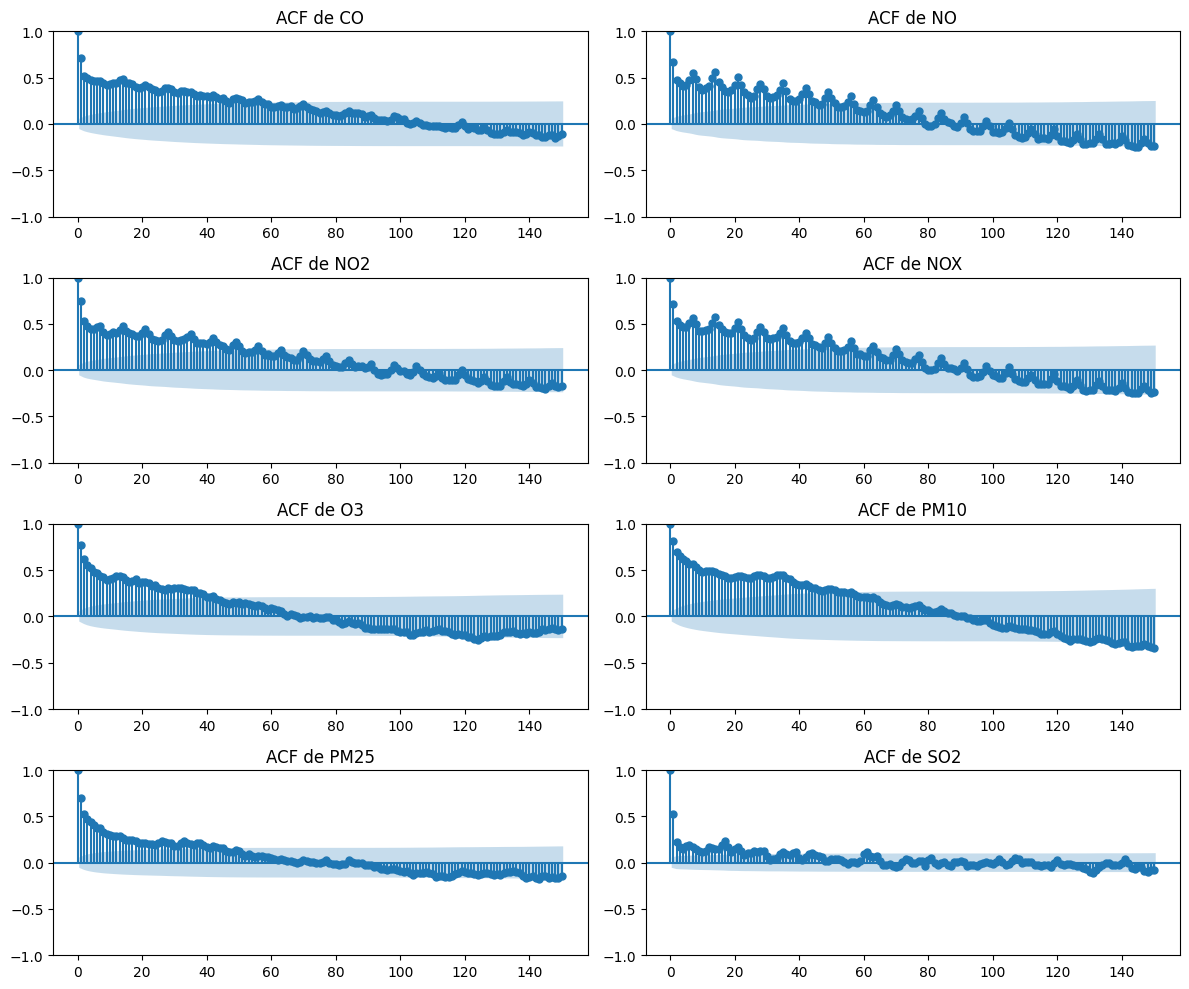

In [ ]:
variables=df_15.columns.tolist()

fig, axes= plt.subplots(nrows=4, ncols=2, figsize=(12,10))
axes=axes.flatten()

for idx, var_name in enumerate(variables):
  plot_acf(df[var_name].dropna(), lags=150, ax=axes[idx])
  axes[idx].set_title(f"ACF de {var_name}")
plt.tight_layout()
plt.show()

  Descomposicion de tendencias STL
  separa la serie en tres componentes
  Tendencia= evolucion a largo plazo
  Estacionalidad: patronnes repetitivos
  ruidos
  

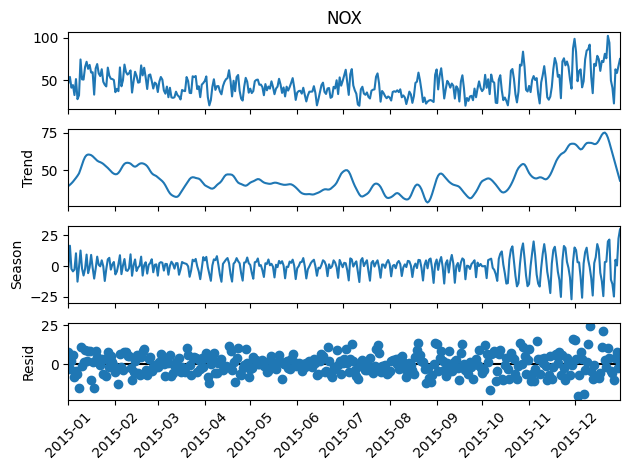

In [ ]:
from statsmodels.tsa.seasonal import STL
stl=STL (df_15["NOX"], period=7)
res=stl.fit()
fig=res.plot()

for ax in fig.axes:
  ax.tick_params(axis="x", labelrotation=45)
plt.tight_layout()
plt.show()

 Trend
Valor maximo de la tendencia aprox =70
Valor minimo de la tendencia aprox =10
rango = max - min = 60

Season
Valor maximo de la tendencia aprox =25
Valor minimo de la tendencia aprox =-25
rango = max - min = 0

Resid
Valor maximo de la tendencia aprox =23
Valor minimo de la tendencia aprox =-23
rango = max - min = 0


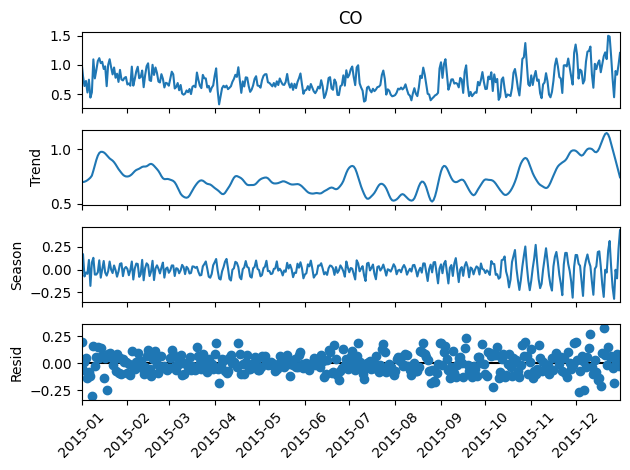

In [ ]:
from statsmodels.tsa.seasonal import STL
stl=STL (df_15["CO"], period=7)
res=stl.fit()
fig=res.plot()

for ax in fig.axes:
  ax.tick_params(axis="x", labelrotation=45)
plt.tight_layout()
plt.show()